# ✓ 필요한 라이브러리 import 하기

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


print('얍💢')


%matplotlib inline

얍💢


# ✓ 데이터 경로 지정하기

In [9]:
# data_dir = os.getenv('HOME')+'/aiffel/kaggle/Hackathon_0208/data'
data_dir = os.getenv('HOME')+'/workplace/kaggle_contest/competitive-data-science-predict-future-sales/'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로
item_category_path = join(data_dir,'item_categories.csv')
items_data_path = join(data_dir,'items.csv')
shops_data_path = join(data_dir,'shops.csv')
# test_data_path = join(data_dir,'test.csv')
sub_data_path = join(data_dir,'sample_submission.csv')

print(train_data_path)
print(test_data_path)
print(item_category_path)
print(items_data_path)
print(shops_data_path)
print(sub_data_path)

/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/sales_train.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/test.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/item_categories.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/items.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/shops.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/sample_submission.csv


# 1. 데이터 살펴보기
# ✓ 데이터 불러오기

In [10]:
data = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
item_category= pd.read_csv(item_category_path)
items = pd.read_csv(items_data_path)
shops =pd.read_csv(shops_data_path)
sub = pd.read_csv(sub_data_path)


print('train data dim : {}'.format(data.shape))
print('test data dim : {}'.format(test.shape))
print('item category data dim : {}'.format(item_category.shape))
print('items data dim : {}'.format(items.shape))
print('shops data dim : {}'.formataiffe(shops.shape))
print('sub data dim : {}'.format(sub.shape))


train data dim : (2935849, 6)
test data dim : (214200, 3)
item category data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)
sub data dim : (214200, 2)


In [11]:
data.head(3) 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [12]:
data.tail(3) 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [13]:
test.head(5) 

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [14]:
item_category.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [15]:
items.head(5) 

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [16]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [17]:
sub.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [18]:

print("train data 중복 수:",sum(data.duplicated()))

print("test  data 중복 수:",sum(test.duplicated()))


train data 중복 수: 6
test  data 중복 수: 0


### 중복 행 출력

In [19]:
data[data.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


### 중복 행 제거

In [20]:
# 중복 제거
data.drop_duplicates(inplace=True)

In [21]:
# 중복 재확인
sum(data.duplicated())

0

### 결측치 확인

In [22]:
#train데이터 결측치 확인
data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [23]:
#test데이터 결측치 확인
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

### outlier (극단치) 제거

```
극단치란
통계적 자료 분석의 결과를 왜곡시키거나, 자료 분석의 적절성을 위협하는 변숫값 

1000과 2000이상의 동떨어진 데이터 들이 존재한다.
우리는 500이하로 범위로 좁혀주자.
```

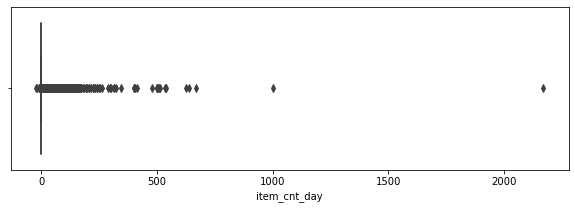

In [24]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=data);

In [25]:
#outlier (극단치) 제거
data = data[data.item_cnt_day < 500]

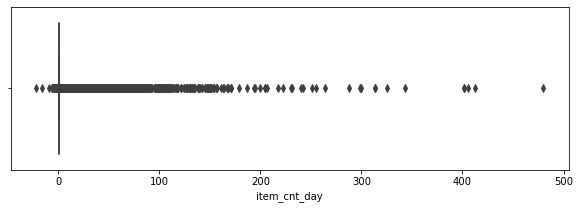

In [26]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=data);

### 음수값도 제거 해주자.

In [27]:
data = data[data.item_cnt_day >= 0]

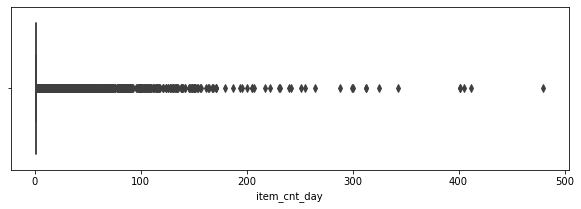

In [28]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=data);

In [29]:
print('train data dim : {}'.format(data.shape))

train data dim : (2928473, 6)


2935849 -> 2928473로 변경

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

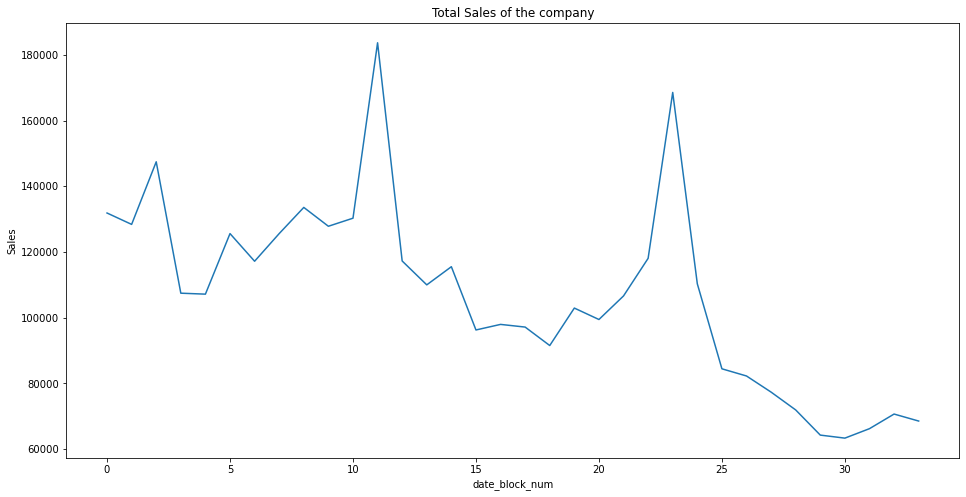

In [44]:
ts=data.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('date_block_num')
plt.ylabel('Sales')
plt.plot(ts);

# Items Analysis

Training Set에는 1804개의  item 존재   
Test Set에는 5100개의  item 존재


In [30]:
items_train = data['item_id'].nunique()
items_test = test['item_id'].nunique()
print('Items in Training Set: ', items_train)
print('Items in Test Set: ', items_test)

Items in Training Set:  21804
Items in Test Set:  5100


In [31]:
group = data.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': ['sum']})

group

item_cnt_day
                                        sum
date_block_num shop_id item_id             
0              0       32               6.0
                       33               3.0
                       35               1.0
                       43               1.0
                       51               2.0
...                                     ...
33             59      22087            6.0
                       22088            2.0
                       22091            1.0
                       22100            1.0
                       22102            1.0

[1608223 rows x 1 columns]

In [32]:
.columns = ['item_cnt_month']group

SyntaxError: invalid syntax (<ipython-input-32-62db14b0472a>, line 1)

In [ ]:
group

In [ ]:
group.reset_index(inplace=True)

In [ ]:
group.head(5)

In [ ]:
group.tail(5)

In [ ]:
print(group.shape)
group.head(3)

In [ ]:
print(test.shape)
test.head(3)

# 테스트 데이터에 컬럼 추가하기

Appending Test Set to Training Set
First, let's insert the date_block_num feature for the test set! Using insert method of pandas to place this new column at a specific index. This will allow us to concatenate the test set easily to the training set before we generate mean encodings and lag features

In [ ]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)
test['item_cnt_month'] = 0
test['item_cnt_month'] = test['item_cnt_month'].astype(np.int8)


print(test.shape)
test.head(3)



### ID 컬럼 삭제


In [ ]:
sub_id =test['ID'][:]
sub=  test.drop('ID', axis = 1)
sub

In [ ]:
new_train = group.append(test.drop('ID', axis = 1))

In [ ]:
new_train

In [ ]:
import xgboost as xgb

In [ ]:
new_train = new_train[new_train.date_block_num > 11]

new_train

In [ ]:
new_train_g = group[group.date_block_num > 30]
new_train_g

# 로그화시킴


In [ ]:
new_train_g['item_cnt_month'] = np.log1p(new_train_g['item_cnt_month'].values)

In [ ]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

https://homeproject.tistory.com/entry/%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D-cross-validation

In [ ]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(new_train_g.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], new_train_g.values, new_train_g['item_cnt_month'])), 
                                                  cv=kfold))
print('얍💢')

In [ ]:
get_cv_score(models)

In [ ]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('얍💢')

In [ ]:
y_pred = AveragingBlending(models, new_train_g, new_train_g['item_cnt_month'], sub)
print(len(y_pred))
y_pred

In [ ]:
result = pd.DataFrame({
    'id' : sub_id, 
    'item_cnt_month' : y_pred
})

result

In [ ]:
(21312312,23 )

(123,)